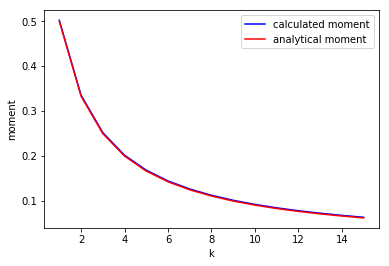

This random number geenrator passes Moment test


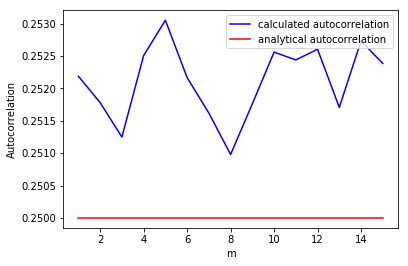

This random number generator does not pass autocorrelation test


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D


N = 50002
r = np.zeros(N+1)

# This the infamous RANDU
coef = 65539
bigint = 2**31

seed = 1.
r[0] = seed
for i in range(1,N+1):
    r[i] = (coef*r[i-1])%bigint
  
r = r/bigint

# Moment test

k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
moment = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
analytical = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in k:
    
    k1 = k[i-1]
    moment_k1 = 0.
    for j in range(0,r.size):
        moment_k1 = moment_k1 + r[j]**k1
    moment_k1 = moment_k1/r.size    
    moment[i-1] = moment_k1
    analytical[i-1] = 1/(k1+1)
    
pyplot.figure()
pyplot.plot(k, moment, 'b', label='calculated moment')
pyplot.plot(k, analytical, 'r', label="analytical moment")
pyplot.xlabel('k')
pyplot.ylabel('moment')
pyplot.legend()
pyplot.show()

print('This random number geenrator passes Moment test')

# Autocorrelation test

m = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
analytical_C = 1/4 # Assuming uniform distribution P(x,y)=1, so \int \int P(x,y) x*y dx dy = (1/2)^2 = 1/4 
C_analytical_array = [0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25]
C_array = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


for i in m:
    sum1 = 0
    N = 0
    m1 = m[i-1]
    list1 = r.size - m1
    for j in range(0,list1):
        sum1 = sum1 + r[j]*r[j+m1]
        N = N + 1
    sum1 = sum1/N
    C_array[i-1] = sum1

pyplot.figure()
pyplot.plot(m, C_array, 'b', label='calculated autocorrelation')
pyplot.plot(m, C_analytical_array, 'r', label="analytical autocorrelation")
pyplot.xlabel('m')
pyplot.ylabel('Autocorrelation')
pyplot.legend()
pyplot.show()

print('This random number generator does not pass autocorrelation test')